In [2]:
# 필수 라이브러리
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.1 MB/s eta 0:00:00


# Online Retail

- 쇼핑몰 고객 주문 데이터 분석
- 데이터셋: OnlineRetail.csv(46.13 MB)
- 출처: https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering/input
- 데이터분석 목표
  - 매출 분석
  - 고객 분석: 우수 고객 찾기, 고객 재구매율 분석

# Dataset Loading

In [58]:
retail = pd.read_csv('OnlineRetail.csv', encoding="ISO-8859-1", header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [59]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**features**
- InvoiceNo: 주문 번호
- StockCode: 상품 코드
- Dscription: 상품 설명
- Quantity: 주문 수량
- InvoiceDate: 주문 날짜
- UnitPrice: 상품 가격
- CustomerID: 고객 아이디
- Country: 주문 지역

In [60]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Preprocessing

## Data cleansing

In [61]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [62]:
# 결측치 모두 제거
retail = retail.dropna()

In [63]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [64]:
#CustomerID 타입 str로 바꾸기

retail['CustomerID'] = retail['CustomerID'].astype(str)

In [65]:
# 수량, 가격 음수인 데이터 제거
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]
len(retail)

397884

In [66]:
# 주문 날짜 컬럼 datetime 타입으로 변경

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [67]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [68]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [69]:
retail.to_csv('RetailClean.csv')

## 고객 기준 데이터셋
- R (Recency): 최근 구매 후 일 수
- F (Frequency): 거래 빈도
- M (Monetary): 거래 총액

In [84]:
# Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [85]:
# Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [86]:
rfm_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4338 non-null   object
 1   Frequency   4338 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.9+ KB


In [87]:
# Merging

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [88]:
#  Recency
## 가장 최근 날짜 구하기

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [89]:
## 거래 날짜와 최근 날짜 사이의 기간

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [90]:
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [91]:
## 일수만 남기기

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [92]:
# Merging

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


### 데이터 분포 파악

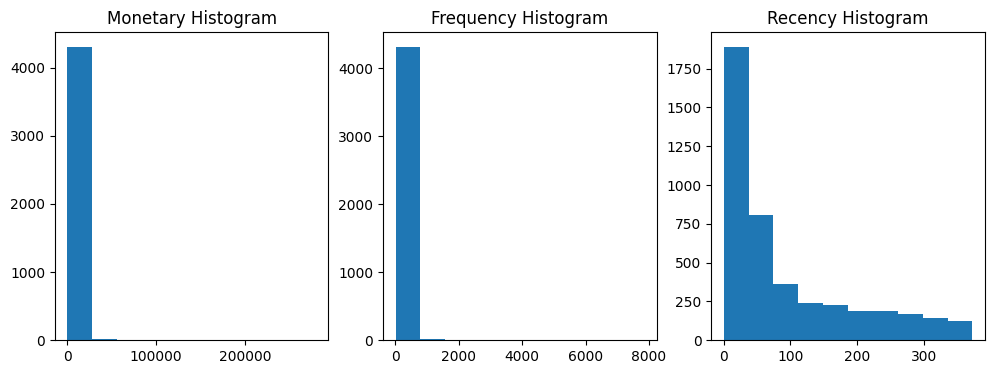

In [94]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
ax1.set_title('Monetary Histogram')
ax1.hist(rfm['Monetary'])

ax2.set_title('Frequency Histogram')
ax2.hist(rfm['Frequency'])

ax3.set_title('Recency Histogram')
ax3.hist(rfm['Recency'])
plt.show()

**왜곡된 데이터**

## Scaling

In [111]:
from sklearn.preprocessing import StandardScaler

x_features = rfm[['Recency', 'Frequency', 'Monetary']].values
x_features_scaled = StandardScaler().fit_transform(x_features)

# Modeling

## K-means cluster

In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(x_features_scaled)
rfm['cluster_label'] = labels

print('실루엣 스코어: {0:.3f}'.format(silhouette_score(x_features_scaled, labels)))

실루엣 스코어: 0.602


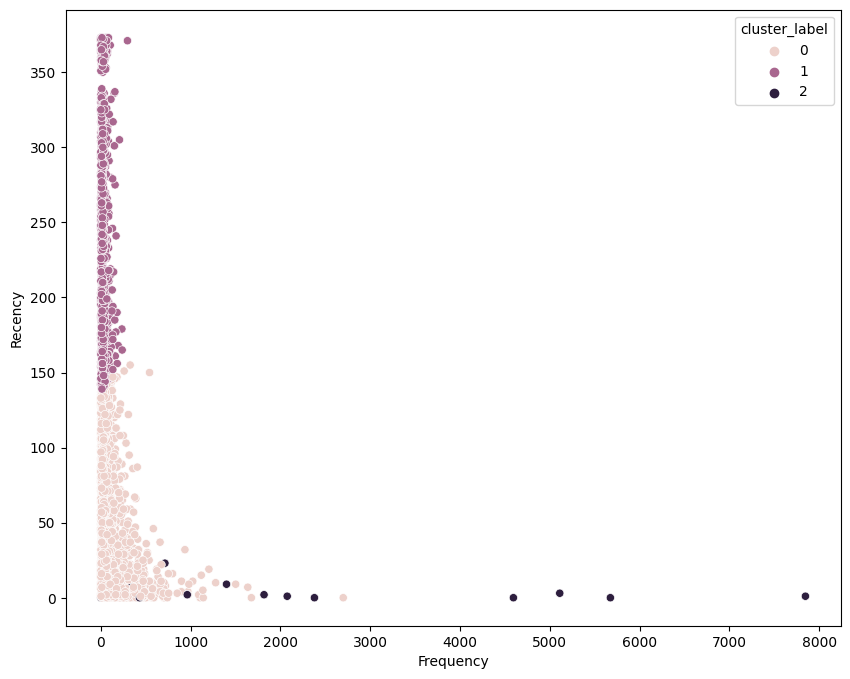

In [115]:
# Recency - Frequency 시각화
sns.scatterplot(data = rfm, x = rfm.Frequency, y = rfm.Recency, hue = 'cluster_label')

plt.show()

- 실루엣 스코어는 나쁘지 않으나 왜곡된 데이터 때문에 분류가 명확하지 않음
- 왜곡된 데이터는 k-means 같은 거리기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과를 도출하게 됨
=> **로그변환**

### log 변환

In [109]:
rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])

# 로그 변환 데이터 scaling
x_features = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']].values
x_features_scaled = StandardScaler().fit_transform(x_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(x_features_scaled)
rfm['cluster_label'] = labels

print(f'실루엣스코어: {silhouette_score(x_features_scaled, labels):.3f}')

실루엣스코어: 0.306


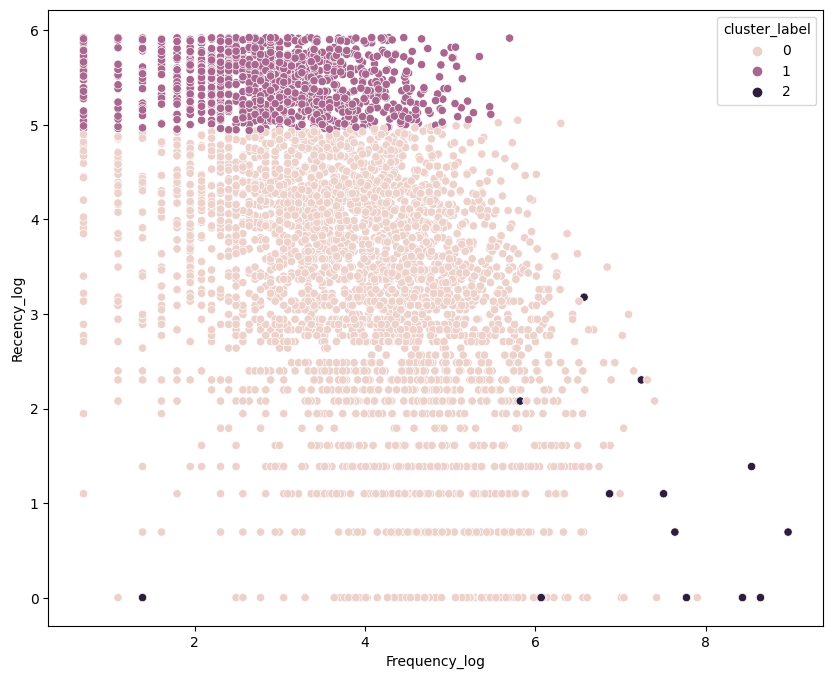

In [116]:
# Recency - Frequency 시각화
sns.scatterplot(data = rfm, x = rfm.Frequency_log, y = rfm.Recency_log, hue = 'cluster_label')

plt.show()

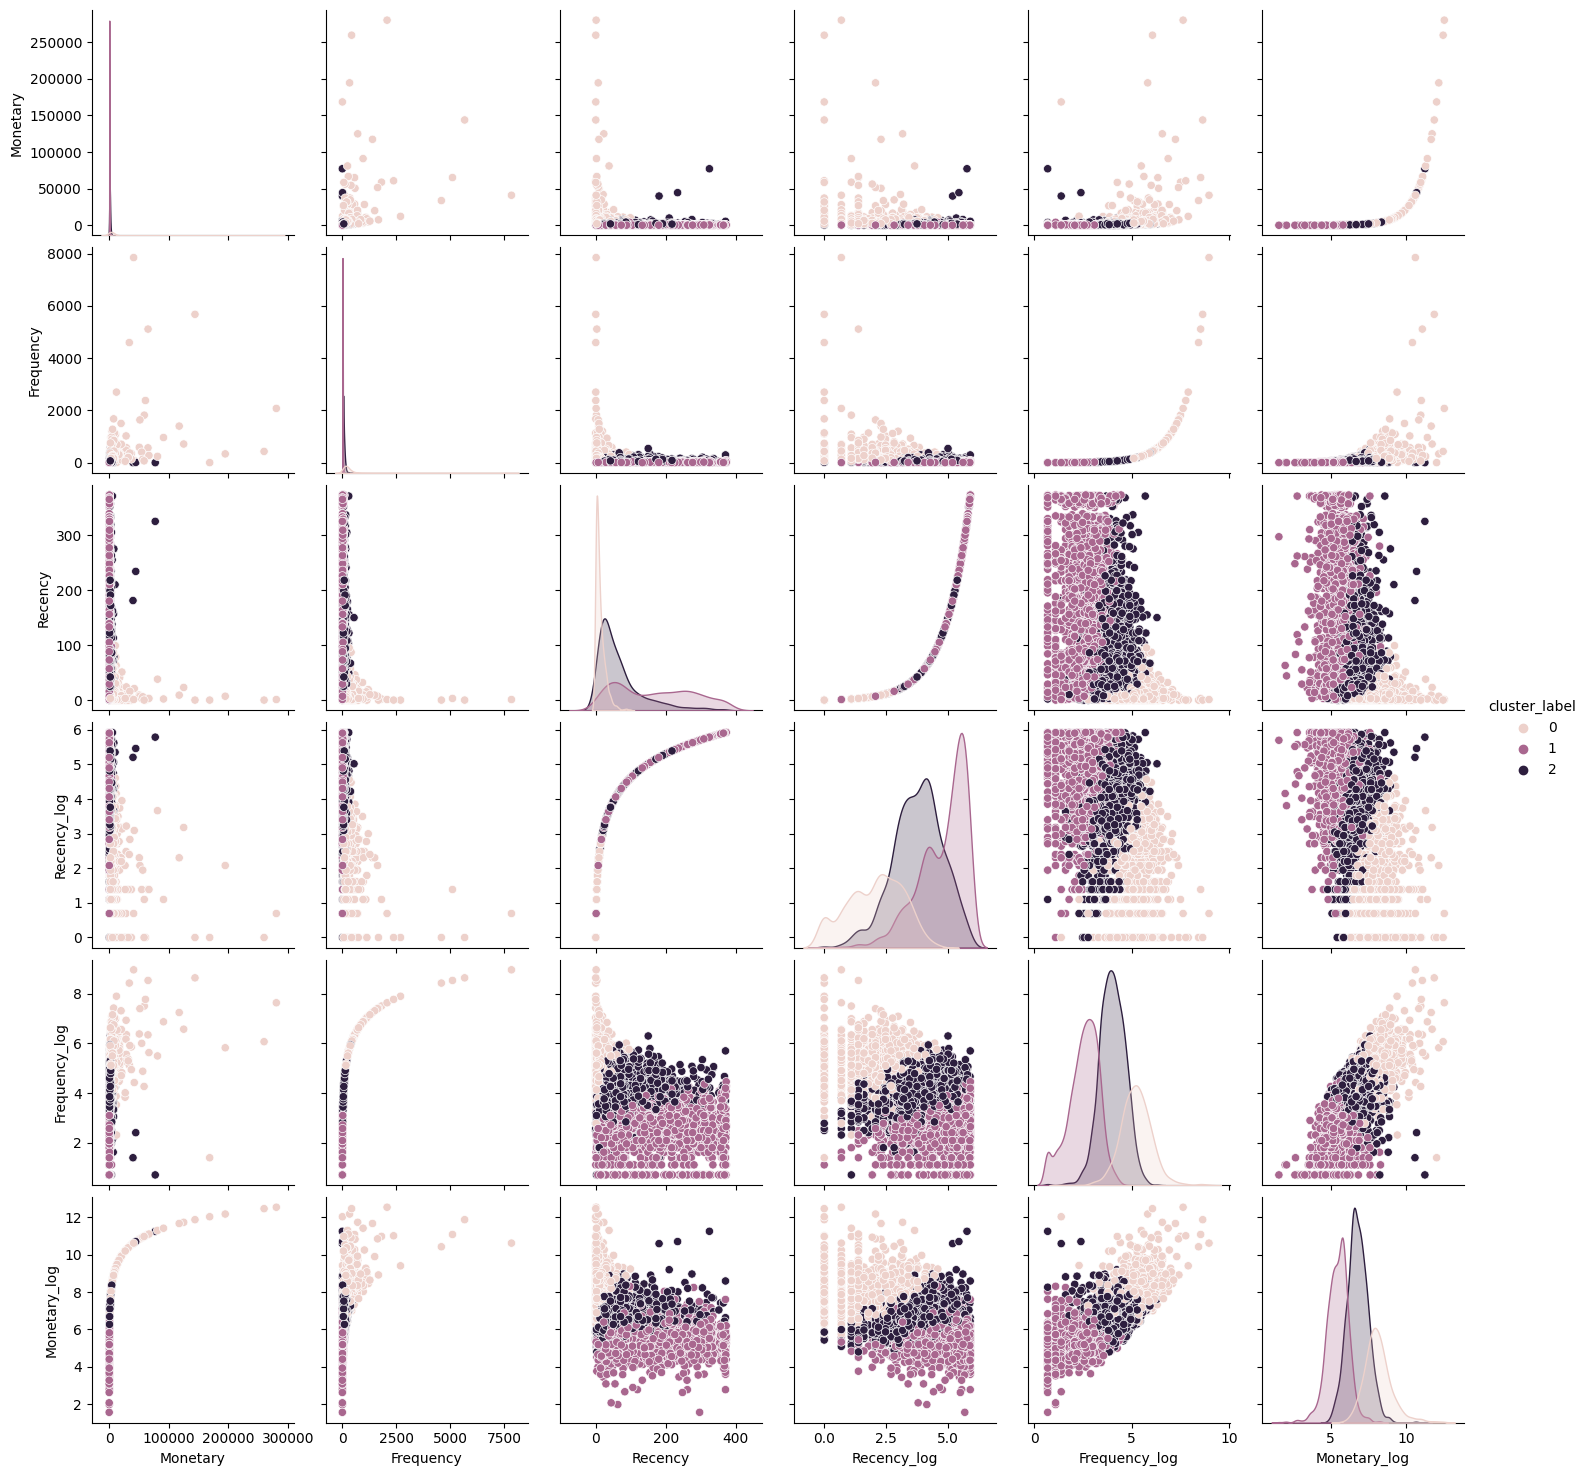

In [100]:
sns.pairplot(rfm, hue = 'cluster_label')
plt.show()

- **실루엣 스코어는 줄었으나 군집별 시각화 해본 결과 로그변환 전보다 로그 변환 후의 k-means의 군집분석이 훨씬 명확함을 알 수 있다.**

# 결론

In [119]:
rfm.cluster_label.value_counts()

0    3245
1    1080
2      13
Name: cluster_label, dtype: int64

In [121]:
label_df = rfm.groupby('cluster_label').mean()
label_df

,Monetary,Frequency,Recency,Recency_log,Frequency_log,Monetary_log
cluster_label,,,,,,
0,2028.833862,103.089060,40.377196,3.210973,4.002452,6.850462
1,637.318510,27.787963,246.308333,5.473540,2.900278,5.762360
2,126118.310000,2565.307692,3.692308,0.963838,7.036151,11.542810


<function matplotlib.pyplot.show(close=None, block=None)>

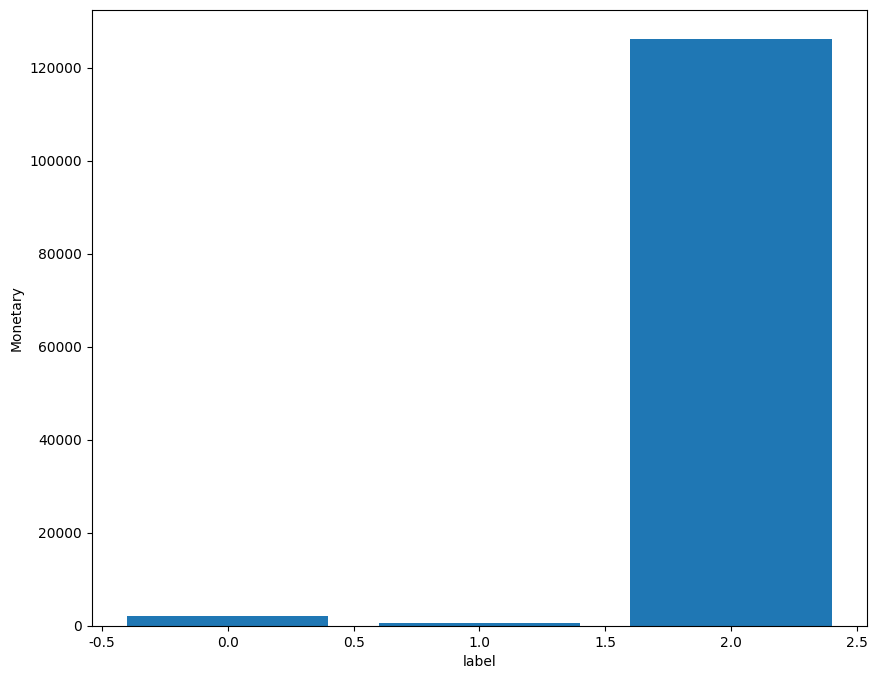

In [126]:
# label 별 개인 평균 지출 금액
plt.bar(label_df.index, label_df['Monetary'])
plt.xlabel('label')
plt.ylabel('Monetary')

plt.show

In [130]:
# VIP 고객이 우리 매출 중 차지하는 비율
(rfm[rfm['cluster_label'] == 2]['Monetary'].sum() / rfm['Monetary'].sum()) * 100

18.398193053917694

In [135]:
# 휴면 고객이 우리 매출 중 차지하는 비율
(rfm[rfm['cluster_label'] == 1]['Monetary'].sum() / rfm['Monetary'].sum()) * 100

7.72385237456189

In [134]:
# 일반 고객이 우리 매출 중 차지하는 비율
(rfm[rfm['cluster_label'] == 0]['Monetary'].sum() / rfm['Monetary'].sum()) * 100

73.87795457152042

- 0: 일반 고객, 주 이용고객
  - 가장 많음
  - 우리 쇼핑몰을 평균 40일 단위로 이용 중
  - 우리 쇼핑몰의 평균적인 고객 수치로 판단
  - 쇼핑몰 전체 매출의 약 74%를 담당
  - 마케팅 전략의 대상

- 1: 휴면 고객
  - 우리 쇼핑몰을 더 이상 이용하지 않거나 몇몇 상품만을 우리 쇼핑몰에서 사는 사람들

- 2: VIP, VVIP
  - 전체 쇼핑몰 이용 대상자에 비하면 극 소수이지만 고객 한 명 당 평균 지출 금액이 매우 높음
  - 금액 뿐만아니라 우리 쇼핑몰의 거래 빈도 또한 높고 쇼핑몰을 찾는 주기 역시 평균 3일로 매우 짧음
  - 최우수 고객 - VIP 대접 필요